In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

df = pd.read_csv('data/employees4.csv', on_bad_lines='skip', infer_datetime_format=True, parse_dates=['Date_Joined', 'Date_Resigned', 'Inactive_Date'])
df.info()
print(f'Total employees {str(df["Employee_Code"].nunique())}')
print(f'Earliest join date {str(df["Date_Joined"].min())}')
print(f'Latest join date {str(df["Date_Joined"].max())}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          1261 non-null   int64         
 1   Employee_Code        1261 non-null   int64         
 2   Name                 1261 non-null   object        
 3   Title                1261 non-null   object        
 4   Address_Line_1       1261 non-null   object        
 5   Address_Line_2       1181 non-null   object        
 6   Address_Line_3       952 non-null    object        
 7   Date_of_Birth        1261 non-null   object        
 8   Gender               1261 non-null   object        
 9   Religion_ID          1261 non-null   int64         
 10  Marital_Status       1170 non-null   object        
 11  Designation_ID       1261 non-null   int64         
 12  Date_Joined          1261 non-null   datetime64[ns]
 13  Date_Resigned        1261 non-nul

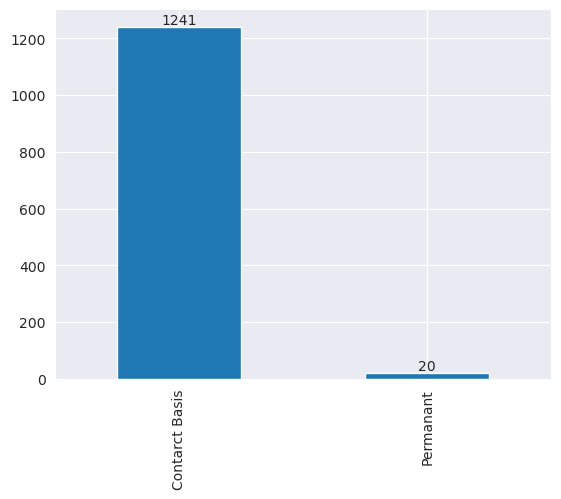

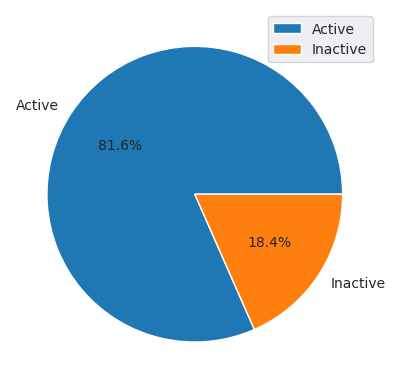

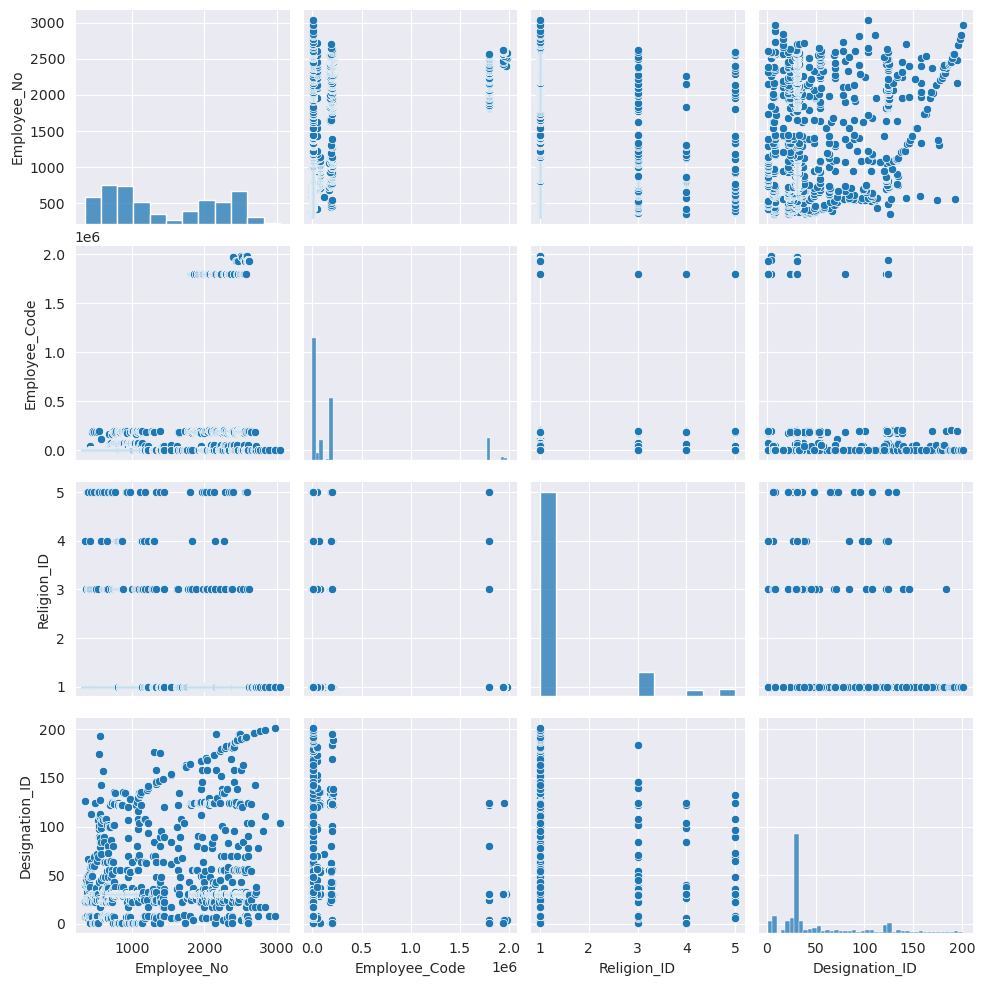

In [6]:
temp_plot = df['Employment_Type'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df['Employment_Type'].value_counts())
plt.show()

plt.pie(df['Status'].value_counts(), labels=df['Status'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

seaborn.pairplot(df)
#temp_plot = df['Designation'].value_counts().plot(kind='pie')
#plt.legend()
#plt.show()

In [7]:
df = df.loc[df['Status'] == 'Inactive']
df = df.drop(df[df['Date_Resigned'] == 'N'].index, inplace=True)
df['Date_Joined'] = pd.to_datetime(df['Date_Joined'])
df['Date_Resigned'] = pd.to_datetime(df['Date_Resigned'])
df['Employment_Duration'] = df['Date_Resigned'] - df['Date_Joined']
df['Employment_Duration'].max()
df2 = df.loc[df['Employment_Type'] == 'Contarct Basis']
print(f"Mean contract basis employee duration {df2['Employment_Duration'].mean()}")
df3 = df.loc[df['Employment_Type'] == 'Permanant']
print(f"Mean permanant employee duration {df3['Employment_Duration'].mean()}")

hello


/tmp/ipykernel_366243/3664656324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.drop(df[df['Date_Resigned'] == 'N'].index, inplace=True)


TypeError: 'NoneType' object is not subscriptable